# Lab1. Back propagation

## (2.A) Datasets
### Dataset 1: Generate linear dataset

In [1]:
def generate_linear(n=100):
    import numpy as np
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1])/1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)

### Dataset 2: Generate XOR dataset

In [2]:
def generate_XOR_easy():
    import numpy as np
    inputs = []
    labels = []
    
    for i in range(11):
        inputs.append([0.1*i, 0.1*i])
        labels.append(0)
        
        if 0.1*i == 0.5:
            continue
        
        inputs.append([0.1*i, 1-0.1*i])
        labels.append(1)
        
    return np.array(inputs), np.array(labels).reshape(21, 1)

In [3]:
x, y = generate_linear(n=100)
x_xor, y_xor = generate_XOR_easy()
print(x.shape,y.shape)

(100, 2) (100, 1)


### Illustration of two Datasets

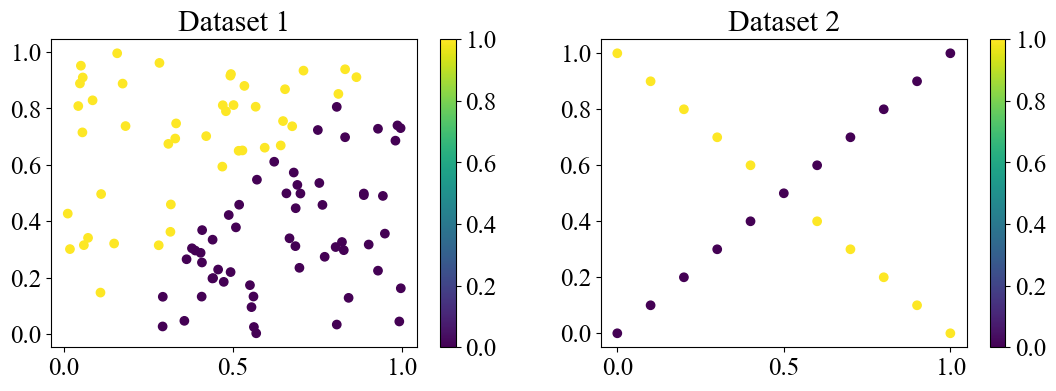

In [4]:
import matplotlib.pyplot as plt
# plt(x,y)
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1,2,1)
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0], marker='o')
plt.title('Dataset 1')
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(x_xor[:, 0], x_xor[:, 1], c=y_xor[:, 0], marker='o')
plt.title('Dataset 2')
plt.colorbar()

## Neural Network
### (2.B) Activation functions: Sigmoid

In [5]:
import numpy as np
# Activation function
def sigmoid(x):    
    return 1/(1+np.exp(-x))

def RELU(x):
    return(np.maximum(0, x))

# Activation derivative for backprop
def sigmoid_derivative(x):
    return x*(1-x)

def RELU_derivative(x):
    return np.where(x>0, 1, 0)

### (2.C-D) NN & Backpropagation

In [6]:
# Main code NN (Sigmoid activation function)
class Lab1_NN:
    def __init__(self, seed, input_size, L1_size, L2_size, Output_size):
        
        # Initial weights (rand variable)
        np.random.seed(seed)
        self.w1 = np.random.rand(input_size, L1_size)
        self.w2 = np.random.rand(L1_size, L2_size)
        self.w3 = np.random.rand(L2_size, Output_size)

        # Initial biases (rand variable)
        self.b1 = np.zeros((1, L1_size))
        self.b2 = np.zeros((1, L2_size))
        self.b3 = np.zeros((1, Output_size))

    def feedforward(self, Input):
        # First hidden layer
        self.z1 = sigmoid(np.dot(Input, self.w1)+self.b1)
        # Second hidden layer
        self.z2 = sigmoid(np.dot(self.z1, self.w2)+self.b2)
        # Output layer
        self.y = sigmoid(np.dot(self.z2, self.w3)+self.b3)
        return self.y

    def backprop(self, Input, GT, learning_rate):
        # Backpropagation and Wights Update
        # W3 & b3
        loss_derivative = (-1)*(GT-self.y)
        Delta_3 = loss_derivative * sigmoid_derivative(self.y)
        self.w3 -= self.z2.T.dot(Delta_3)*learning_rate
        self.b3 -= np.sum(Delta_3, axis=0, keepdims=True)*learning_rate
        
        # W2 & b2
        Delta_3_w3_T = Delta_3.dot(self.w3.T)
        Delta_2 = Delta_3_w3_T*sigmoid_derivative(self.z2)
        self.w2 -= self.z1.T.dot(Delta_2)*learning_rate
        self.b2 -= np.sum(Delta_2, axis=0, keepdims=True)*learning_rate
        
        # W1 & b1
        Delta_2_w2_T = Delta_2.dot(self.w2.T)
        Delta_1 = Delta_2_w2_T*sigmoid_derivative(self.z1)
        self.w1 -= Input.T.dot(Delta_1)*learning_rate
        self.b1 -= np.sum(Delta_1, axis=0, keepdims=True)*learning_rate

    def train(self, Input, GT, lr, epochs, printsize):
        train_loss = []; train_acc = [];
        for epoch in range(epochs):
            output = self.feedforward(Input)
            loss = np.mean(np.square(GT-output))
            acc = np.mean(output.round(0) == GT)
            train_loss.append(loss)
            train_acc.append(acc)
            self.backprop(Input, GT, lr)
            if epoch%printsize == 0:
                print(f"Epoch: {epoch}, Loss: {loss:.6f}")
        return output, train_loss, train_acc

## Experiment
### (3.A) Main training

In [7]:
# Main 
seed = 41
input_size = 2
L1_size = 3
L2_size = 3
Output_size = 1
lr = 0.001
lr_xor = 0.01
epochs = 100000
epochs_xor = 200000
printsize = 5000
printsize_xor = 10000

print('Dataset 1')
print('--------------------------------------')
nn = Lab1_NN(seed, input_size, L1_size, L2_size, Output_size)
pred, loss, acc = nn.train(x, y, lr, epochs, printsize)

print('--------------------------------------')
print('Dataset 2')
print('--------------------------------------')
nn_xor = Lab1_NN(seed, input_size, L1_size, L2_size, Output_size)
pred_xor, loss_xor, acc_xor = nn_xor.train(x_xor, y_xor, lr_xor, epochs_xor, printsize_xor)

Dataset 1
--------------------------------------
Epoch: 0, Loss: 0.307080
Epoch: 5000, Loss: 0.245031
Epoch: 10000, Loss: 0.244696
Epoch: 15000, Loss: 0.243085
Epoch: 20000, Loss: 0.226788
Epoch: 25000, Loss: 0.069492
Epoch: 30000, Loss: 0.031098
Epoch: 35000, Loss: 0.020979
Epoch: 40000, Loss: 0.015854
Epoch: 45000, Loss: 0.012662
Epoch: 50000, Loss: 0.010464
Epoch: 55000, Loss: 0.008854
Epoch: 60000, Loss: 0.007625
Epoch: 65000, Loss: 0.006658
Epoch: 70000, Loss: 0.005878
Epoch: 75000, Loss: 0.005239
Epoch: 80000, Loss: 0.004706
Epoch: 85000, Loss: 0.004256
Epoch: 90000, Loss: 0.003872
Epoch: 95000, Loss: 0.003542
--------------------------------------
Dataset 2
--------------------------------------
Epoch: 0, Loss: 0.290255
Epoch: 10000, Loss: 0.249381
Epoch: 20000, Loss: 0.249301
Epoch: 30000, Loss: 0.248946
Epoch: 40000, Loss: 0.244773
Epoch: 50000, Loss: 0.165840
Epoch: 60000, Loss: 0.064409
Epoch: 70000, Loss: 0.046330
Epoch: 80000, Loss: 0.044203
Epoch: 90000, Loss: 0.043737
Ep

### (3.A) Show comparative result
### Main: Dataset 1

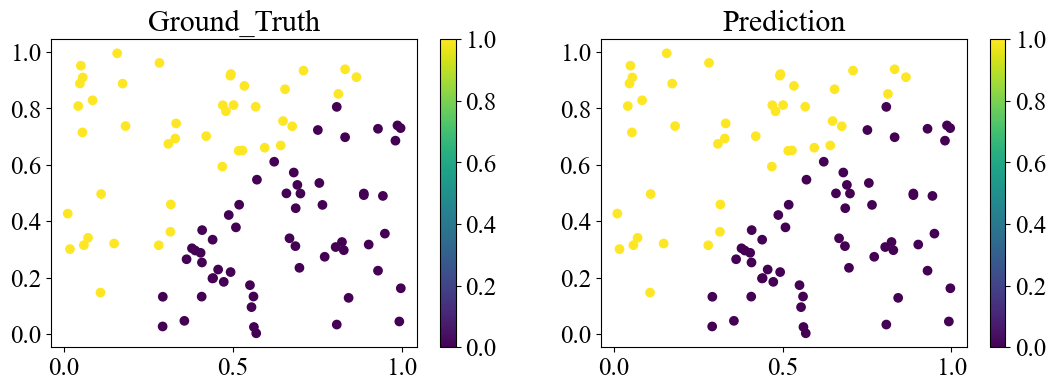

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (13, 4)

plt.subplot(1,2,1)
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0], marker='o')
plt.title('Ground_Truth')
plt.colorbar()

plt.subplot(1,2,2)
plt.scatter(x[:, 0], x[:, 1], c=pred[:, 0].round(0), marker='o', label='Ground Truth')
plt.title('Prediction')
plt.colorbar()
plt.show()

### Main: Dataset 2

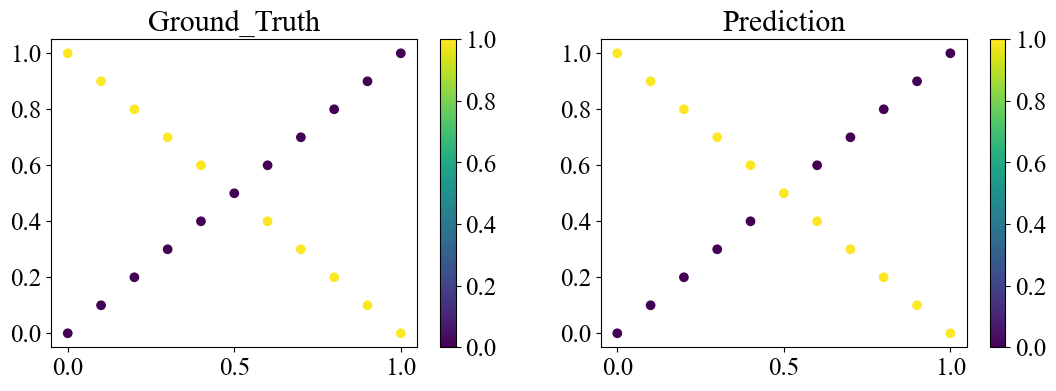

In [9]:
pred_xor
plt.subplot(1,2,1)
plt.scatter(x_xor[:, 0], x_xor[:, 1], c=y_xor[:, 0], marker='o')
plt.title('Ground_Truth')
plt.colorbar()

plt.subplot(1,2,2)
plt.scatter(x_xor[:, 0], x_xor[:, 1], c=pred_xor[:, 0].round(0), marker='o', label='Ground Truth')
plt.title('Prediction')
plt.colorbar()
plt.show()

### (3.B) Show accuracy of the prediction
### Main: Dataset 1

In [10]:
for i in range(len(x)):
    print(f"Num: {i:02d} | GT: {y[i][0]} | pred: {pred[i,0]:.6f}")
print(f"Loss: {loss[-1]:.6f} | Accuracy: {acc[-1]}")

Num: 00 | GT: 1 | pred: 0.999764
Num: 01 | GT: 1 | pred: 0.999729
Num: 02 | GT: 1 | pred: 0.999834
Num: 03 | GT: 1 | pred: 0.999857
Num: 04 | GT: 0 | pred: 0.000832
Num: 05 | GT: 0 | pred: 0.031676
Num: 06 | GT: 0 | pred: 0.002538
Num: 07 | GT: 0 | pred: 0.000670
Num: 08 | GT: 1 | pred: 0.999706
Num: 09 | GT: 0 | pred: 0.000526
Num: 10 | GT: 0 | pred: 0.000455
Num: 11 | GT: 1 | pred: 0.999809
Num: 12 | GT: 0 | pred: 0.026200
Num: 13 | GT: 0 | pred: 0.002885
Num: 14 | GT: 0 | pred: 0.000786
Num: 15 | GT: 0 | pred: 0.093021
Num: 16 | GT: 0 | pred: 0.000420
Num: 17 | GT: 1 | pred: 0.999794
Num: 18 | GT: 1 | pred: 0.996814
Num: 19 | GT: 0 | pred: 0.005690
Num: 20 | GT: 1 | pred: 0.999873
Num: 21 | GT: 1 | pred: 0.993654
Num: 22 | GT: 1 | pred: 0.999873
Num: 23 | GT: 0 | pred: 0.011251
Num: 24 | GT: 1 | pred: 0.999870
Num: 25 | GT: 1 | pred: 0.806268
Num: 26 | GT: 0 | pred: 0.002074
Num: 27 | GT: 0 | pred: 0.001059
Num: 28 | GT: 1 | pred: 0.999865
Num: 29 | GT: 0 | pred: 0.000622
Num: 30 | 

### Main: Dataset 2

In [11]:
for i in range(len(x_xor)):
    print(f"Num: {i:02d} | GT: {y_xor[i][0]} | pred: {pred_xor[i,0]:.6f}")
print(f"Loss: {loss_xor[-1]:.6f} | Accuracy: {acc_xor[-1]}")

Num: 00 | GT: 0 | pred: 0.000130
Num: 01 | GT: 1 | pred: 0.908201
Num: 02 | GT: 0 | pred: 0.000110
Num: 03 | GT: 1 | pred: 0.908201
Num: 04 | GT: 0 | pred: 0.000093
Num: 05 | GT: 1 | pred: 0.908201
Num: 06 | GT: 0 | pred: 0.000139
Num: 07 | GT: 1 | pred: 0.908201
Num: 08 | GT: 0 | pred: 0.020493
Num: 09 | GT: 1 | pred: 0.908201
Num: 10 | GT: 0 | pred: 0.908201
Num: 11 | GT: 0 | pred: 0.022758
Num: 12 | GT: 1 | pred: 0.908201
Num: 13 | GT: 0 | pred: 0.000111
Num: 14 | GT: 1 | pred: 0.908201
Num: 15 | GT: 0 | pred: 0.000033
Num: 16 | GT: 1 | pred: 0.908201
Num: 17 | GT: 0 | pred: 0.000024
Num: 18 | GT: 1 | pred: 0.908201
Num: 19 | GT: 0 | pred: 0.000022
Num: 20 | GT: 1 | pred: 0.908201
Loss: 0.043335 | Accuracy: 0.9523809523809523


### (3.C) Learning curve
### Main: Dataset 1

Text(0.5, 1.0, 'loss')

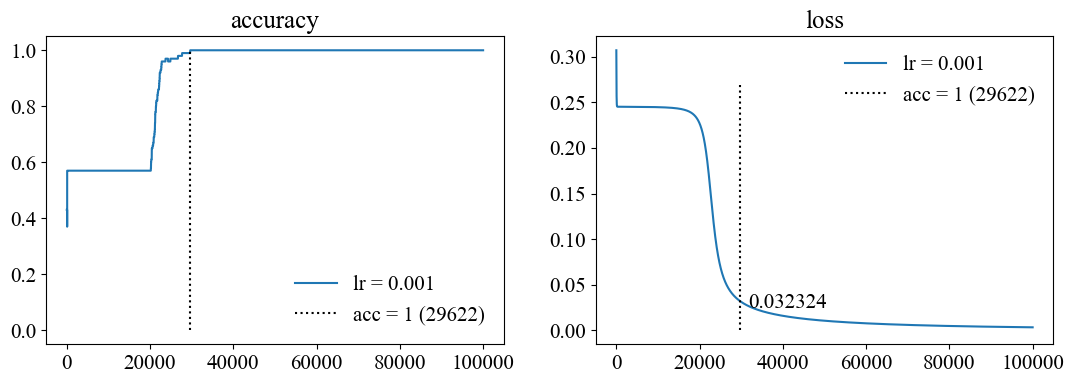

In [30]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1,2,1)
plt.plot(acc, label = 'lr = 0.001')
min_acc_1 = np.where(np.array(acc) >= 1)
plt.plot([min_acc_1[0][0], min_acc_1[0][0]],[0, 1],'k:', label = 'acc = 1 ('+str(min_acc_1[0][0])+')')
plt.legend(loc = 4,frameon=False)
plt.title('accuracy')
plt.subplot(1,2,2)
plt.plot(loss, label = 'lr = 0.001')
plt.plot([min_acc_1[0][0], min_acc_1[0][0]],[0, 0.27],'k:', label = 'acc = 1 ('+str(min_acc_1[0][0])+')')
plt.text(min_acc_1[0][0]+2000,0.025, loss[min_acc_1[0][0]].round(6))
plt.legend(loc = 1,frameon=False)
plt.title('loss')

### Main: Dataset 2

Text(0.5, 1.0, 'loss')

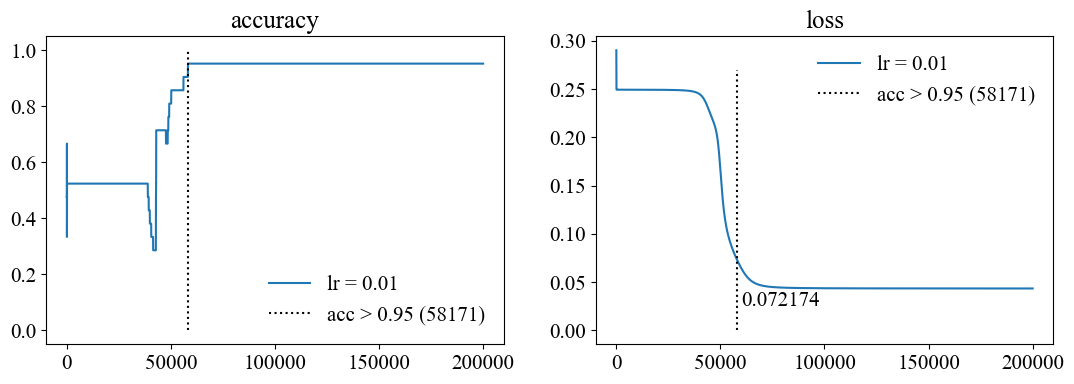

In [31]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(acc_xor, label = 'lr = 0.01')
min_acc_1 = np.where(np.array(acc_xor) >= 0.95)
plt.plot([min_acc_1[0][0], min_acc_1[0][0]],[0, 1],'k:', label = ('acc > 0.95 ('+str(min_acc_1[0][0])+')'))
plt.legend(loc = 4, frameon=False)
plt.title('accuracy')
plt.subplot(1,2,2)
plt.plot(loss_xor, label = 'lr = 0.01')
plt.plot([min_acc_1[0][0], min_acc_1[0][0]],[0, 0.27],'k:', label = ('acc > 0.95 ('+str(min_acc_1[0][0])+')'))
plt.text(min_acc_1[0][0]+2000,0.025, loss_xor[min_acc_1[0][0]].round(6))
plt.legend(loc = 1, frameon=False)
plt.title('loss')

## Test on hyperparameters/ transfomation function
### (4.A) Different learning rates

In [14]:
seed = 41
input_size = 2
L1_size = 3
L2_size = 3
Output_size = 1
lr = 0.001
lr_mid = 0.005
lr_fast = 0.01
epochs = 100000
epochs_xor = 200000

print('Dataset 1 in process')
nn_lr = Lab1_NN(seed, input_size, L1_size, L2_size, Output_size)
pred_lr, loss_lr, acc_lr = nn_lr.train(x, y, lr, epochs, epochs)

nn_lrM = Lab1_NN(seed, input_size, L1_size, L2_size, Output_size)
pred_lrM, loss_lrM, acc_lrM = nn_lrM.train(x, y, lr_mid, epochs, epochs)

nn_lrF = Lab1_NN(seed, input_size, L1_size, L2_size, Output_size)
pred_lrF, loss_lrF, acc_lrF = nn_lrF.train(x, y, lr_fast, epochs, epochs)
print('--------------------------------------')
print('Dataset 2 in process')
nn_xor_lr = Lab1_NN(seed, input_size, L1_size, L2_size, Output_size)
pred_xor_lr, loss_xor_lr, acc_xor_lr = nn_xor_lr.train(x_xor, y_xor, lr, epochs_xor, epochs_xor)

nn_xor_lrM = Lab1_NN(seed, input_size, L1_size, L2_size, Output_size)
pred_xor_lrM, loss_xor_lrM, acc_xor_lrM = nn_xor_lrM.train(x_xor, y_xor, lr_mid, epochs_xor, epochs_xor)

nn_xor_lrF = Lab1_NN(seed, input_size, L1_size, L2_size, Output_size)
pred_xor_lrF, loss_xor_lrF, acc_xor_lrF = nn_xor_lrF.train(x_xor, y_xor, lr_fast, epochs_xor, epochs_xor)
print('--------------------------------------')

Dataset 1 in process
Epoch: 0, Loss: 0.307080
Epoch: 0, Loss: 0.307080
Epoch: 0, Loss: 0.307080
--------------------------------------
Dataset 2 in process
Epoch: 0, Loss: 0.290255
Epoch: 0, Loss: 0.290255
Epoch: 0, Loss: 0.290255
--------------------------------------


#### Draw the result of different learning rates
#### LR study: Dataset 1

Text(0.5, 1.0, 'loss')

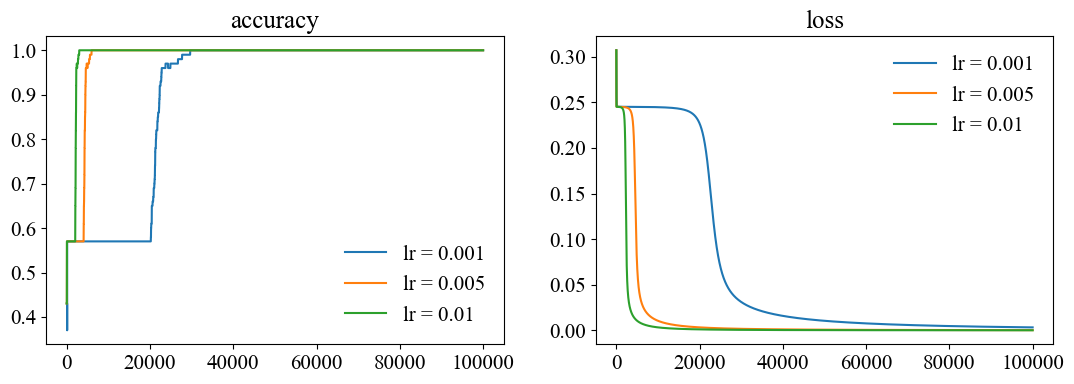

In [15]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1,2,1)
plt.plot(acc_lr, label = 'lr = 0.001')
plt.plot(acc_lrM, label = 'lr = 0.005')
plt.plot(acc_lrF, label = 'lr = 0.01')
plt.legend(loc = 4,frameon=False)
plt.title('accuracy')
plt.subplot(1,2,2)
plt.plot(loss_lr, label = 'lr = 0.001')
plt.plot(loss_lrM, label = 'lr = 0.005')
plt.plot(loss_lrF, label = 'lr = 0.01')
plt.legend(loc = 1,frameon=False)
plt.title('loss')

#### LR Study: Dataset 2

Text(0.5, 1.0, 'loss')

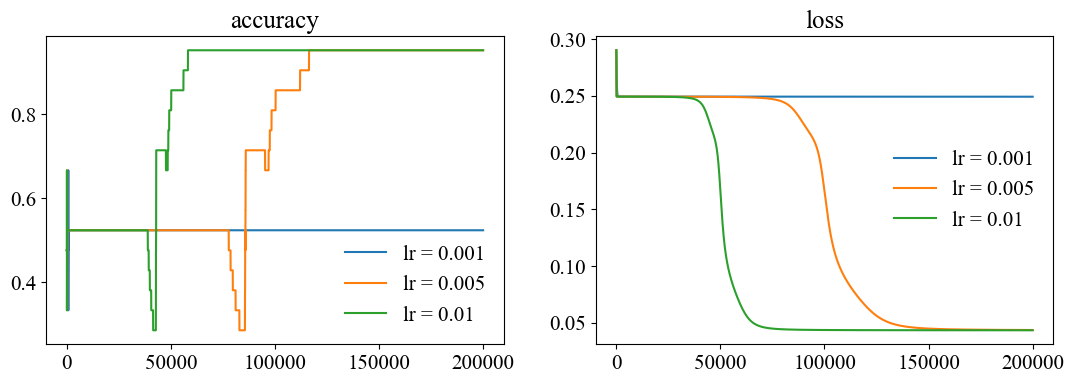

In [32]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1,2,1)
plt.plot(acc_xor_lr, label = 'lr = 0.001')
plt.plot(acc_xor_lrM, label = 'lr = 0.005')
plt.plot(acc_xor_lrF, label = 'lr = 0.01')
plt.legend(loc = 4,frameon=False)
plt.title('accuracy')
plt.subplot(1,2,2)
plt.plot(loss_xor_lr, label = 'lr = 0.001')
plt.plot(loss_xor_lrM, label = 'lr = 0.005')
plt.plot(loss_xor_lrF, label = 'lr = 0.01')
plt.legend(loc = 5,frameon=False)
plt.title('loss')

### (4.B) Different number of hidden units

In [17]:
lr = 0.001
lr_fast = 0.01
epochs = 100000
epochs_xor = 200000
print('Dataset 1 in process')
# 2-3-3-1 original
nn_h1 = Lab1_NN(seed, input_size, L1_size, L2_size, Output_size)
pred_h1, loss_h1, acc_h1 = nn_h1.train(x, y, lr, epochs, epochs)

# 2-2-2-1
L = [2, 2, 2, 1]
nn_h2 = Lab1_NN(seed, L[0], L[1], L[2], L[3])
pred_h2, loss_h2, acc_h2 = nn_h2.train(x, y, lr, epochs, epochs)

# 2-4-2-1
L = [2, 4, 2, 1]
nn_h3 = Lab1_NN(seed, L[0], L[1], L[2], L[3])
pred_h3, loss_h3, acc_h3 = nn_h3.train(x, y, lr, epochs, epochs)

# 2-1-2-1
L = [2, 1, 2, 1]
nn_h4 = Lab1_NN(seed, L[0], L[1], L[2], L[3])
pred_h4, loss_h4, acc_h4 = nn_h4.train(x, y, lr, epochs, epochs)

print('--------------------------------------')
print('Dataset 2 in process')
# 2-3-3-1 original
nn_xor_h1 = Lab1_NN(seed, input_size, L1_size, L2_size, Output_size)
pred_xor_h1, loss_xor_h1, acc_xor_h1 = nn_xor_h1.train(x_xor, y_xor, lr_fast, epochs_xor, epochs_xor)

# 2-2-2-1
L = [2, 2, 2, 1]
nn_xor_h2 = Lab1_NN(seed, L[0], L[1], L[2], L[3])
pred_xor_h2, loss_xor_h2, acc_xor_h2 = nn_xor_h2.train(x_xor, y_xor, lr_fast, epochs_xor, epochs_xor)

# 2-4-2-1
L = [2, 4, 2, 1]
nn_xor_h3 = Lab1_NN(seed, L[0], L[1], L[2], L[3])
pred_xor_h3, loss_xor_h3, acc_xor_h3 = nn_xor_h3.train(x_xor, y_xor, lr_fast, epochs_xor, epochs_xor)

# 2-1-2-1
L = [2, 1, 2, 1]
nn_xor_h4 = Lab1_NN(seed, L[0], L[1], L[2], L[3])
pred_xor_h4, loss_xor_h4, acc_xor_h4 = nn_xor_h4.train(x_xor, y_xor, lr_fast, epochs_xor, epochs_xor)
print('--------------------------------------')

Dataset 1 in process
Epoch: 0, Loss: 0.307080
Epoch: 0, Loss: 0.309967
Epoch: 0, Loss: 0.304923
Epoch: 0, Loss: 0.271541
--------------------------------------
Dataset 2 in process
Epoch: 0, Loss: 0.290255
Epoch: 0, Loss: 0.293143
Epoch: 0, Loss: 0.289043
Epoch: 0, Loss: 0.262951
--------------------------------------


#### Draw the result of different hidden units
#### HL study: Dataset 1

Text(0.5, 1.0, 'loss')

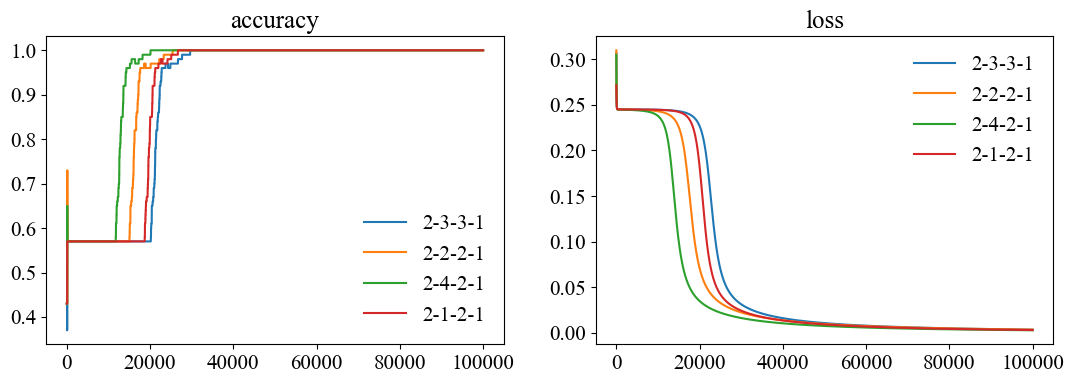

In [18]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1,2,1)
plt.plot(acc_h1, label = '2-3-3-1')
plt.plot(acc_h2, label = '2-2-2-1')
plt.plot(acc_h3, label = '2-4-2-1')
plt.plot(acc_h4, label = '2-1-2-1')
plt.legend(loc = 4, frameon=False)
plt.title('accuracy')
plt.subplot(1,2,2)
plt.plot(loss_h1, label = '2-3-3-1')
plt.plot(loss_h2, label = '2-2-2-1')
plt.plot(loss_h3, label = '2-4-2-1')
plt.plot(loss_h4, label = '2-1-2-1')
plt.legend(loc = 1, frameon=False)
plt.title('loss')

#### HL study: Dataset 2

Text(0.5, 1.0, 'loss')

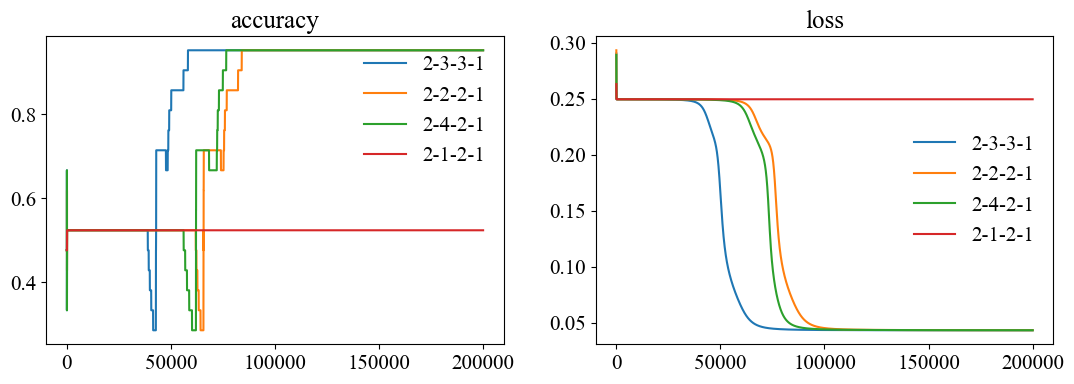

In [33]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1,2,1)
plt.plot(acc_xor_h1,label = '2-3-3-1')
plt.plot(acc_xor_h2,label = '2-2-2-1')
plt.plot(acc_xor_h3,label = '2-4-2-1')
plt.plot(acc_xor_h4,label = '2-1-2-1')
plt.legend(loc = 1, frameon=False)
plt.title('accuracy')
plt.subplot(1,2,2)
plt.plot(loss_xor_h1,label = '2-3-3-1')
plt.plot(loss_xor_h2,label = '2-2-2-1')
plt.plot(loss_xor_h3,label = '2-4-2-1')
plt.plot(loss_xor_h4,label = '2-1-2-1')
plt.legend(loc = 5, frameon=False)
plt.title('loss')

### (4.C) Try without activation functions
### Neural Network without sigmoid

In [20]:
# Main code NN (Sigmoid activation function)
class Lab1_NN_without_A:
    def __init__(self, seed, input_size, L1_size, L2_size, Output_size):
        
        # Initial weights (rand variable)
        np.random.seed(seed)
        self.w1 = np.random.rand(input_size, L1_size)
        self.w2 = np.random.rand(L1_size, L2_size)
        self.w3 = np.random.rand(L2_size, Output_size)

        # Initial biases (rand variable)
        self.b1 = np.zeros((1, L1_size))
        self.b2 = np.zeros((1, L2_size))
        self.b3 = np.zeros((1, Output_size))

    def feedforward(self, Input):
        # First hidden layer
        self.z1 = np.dot(Input, self.w1)+self.b1
        # Second hidden layer
        self.z2 = np.dot(self.z1, self.w2)+self.b2
        # Output layer
        self.y = np.dot(self.z2, self.w3)+self.b3
        return self.y

    def backprop(self, Input, GT, learning_rate):
        # Backpropagation and Wights Update
        # W3 & b3
        loss_derivative = (-1)*(GT-self.y)
        Delta_3 = loss_derivative
        self.w3 -= self.z2.T.dot(Delta_3)*learning_rate
        self.b3 -= np.sum(Delta_3, axis=0, keepdims=True)*learning_rate
        
        # W2 & b2
        Delta_3_w3_T = Delta_3.dot(self.w3.T)
        Delta_2 = Delta_3_w3_T
        self.w2 -= self.z1.T.dot(Delta_2)*learning_rate
        self.b2 -= np.sum(Delta_2, axis=0, keepdims=True)*learning_rate
        
        # W1 & b1
        Delta_2_w2_T = Delta_2.dot(self.w2.T)
        Delta_1 = Delta_2_w2_T
        self.w1 -= Input.T.dot(Delta_1)*learning_rate
        self.b1 -= np.sum(Delta_1, axis=0, keepdims=True)*learning_rate

    def train(self, Input, GT, lr, epochs, printsize):
        train_loss = []; train_acc = [];
        for epoch in range(epochs):
            output = self.feedforward(Input)
            loss = np.mean(np.square(GT-output))
            acc = np.mean(output.round(0) == GT)
            train_loss.append(loss)
            train_acc.append(acc)
            self.backprop(Input, GT, lr)
            if epoch%printsize == 0:
                print(f"Epoch: {epoch}, Loss: {loss:.6f}")
        return output, train_loss, train_acc

In [21]:
seed = 41
input_size = 2
L1_size = 3
L2_size = 3
Output_size = 1
lr = 0.001
lr_xor = 0.01
epochs = 100000
epochs_xor = 200000
print('Dataset 1 in process')
print('Dataset 1')
print('--------------------------------------')
nn_noS = Lab1_NN_without_A(seed, input_size, L1_size, L2_size, Output_size)
pred_noS, loss_noS, acc_noS = nn_noS.train(x, y, lr, epochs, printsize)

print('--------------------------------------')
print('Dataset 2')
print('--------------------------------------')
nn_xor_noS = Lab1_NN_without_A(seed, input_size, L1_size, L2_size, Output_size)
pred_xor_noS, loss_xor_noS, acc_xor_noS = nn_xor_noS.train(x_xor, y_xor, lr_xor, epochs_xor, printsize_xor)

Dataset 1 in process
Dataset 1
--------------------------------------
Epoch: 0, Loss: 0.284121
Epoch: 5000, Loss: 0.085574
Epoch: 10000, Loss: 0.085574
Epoch: 15000, Loss: 0.085574
Epoch: 20000, Loss: 0.085574
Epoch: 25000, Loss: 0.085574
Epoch: 30000, Loss: 0.085574
Epoch: 35000, Loss: 0.085574
Epoch: 40000, Loss: 0.085574
Epoch: 45000, Loss: 0.085574
Epoch: 50000, Loss: 0.085574
Epoch: 55000, Loss: 0.085574
Epoch: 60000, Loss: 0.085574
Epoch: 65000, Loss: 0.085574
Epoch: 70000, Loss: 0.085574
Epoch: 75000, Loss: 0.085574
Epoch: 80000, Loss: 0.085574
Epoch: 85000, Loss: 0.085574
Epoch: 90000, Loss: 0.085574
Epoch: 95000, Loss: 0.085574
--------------------------------------
Dataset 2
--------------------------------------
Epoch: 0, Loss: 0.290131
Epoch: 10000, Loss: 0.249433
Epoch: 20000, Loss: 0.249433
Epoch: 30000, Loss: 0.249433
Epoch: 40000, Loss: 0.249433
Epoch: 50000, Loss: 0.249433
Epoch: 60000, Loss: 0.249433
Epoch: 70000, Loss: 0.249433
Epoch: 80000, Loss: 0.249433
Epoch: 900

#### Show the learning curve
#### No sigmoid: Dataset 1

Text(0.5, 1.0, 'loss')

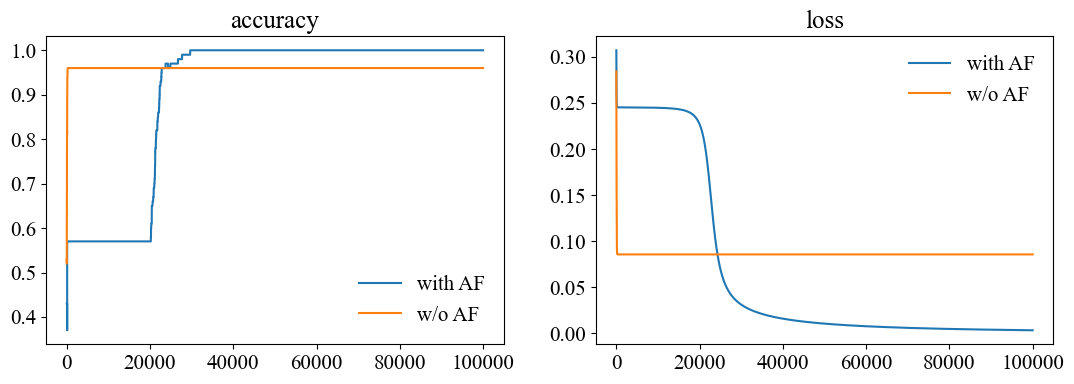

In [22]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1,2,1)
plt.plot(acc, label = 'with AF')
plt.plot(acc_noS, label = 'w/o AF')
plt.legend(loc = 4, frameon=False)
plt.title('accuracy')
plt.subplot(1,2,2)
plt.plot(loss, label = 'with AF')
plt.plot(loss_noS, label = 'w/o AF')
plt.legend(loc = 1, frameon=False)
plt.title('loss')

#### No sigmoid: Dataset 2

Text(0.5, 1.0, 'loss')

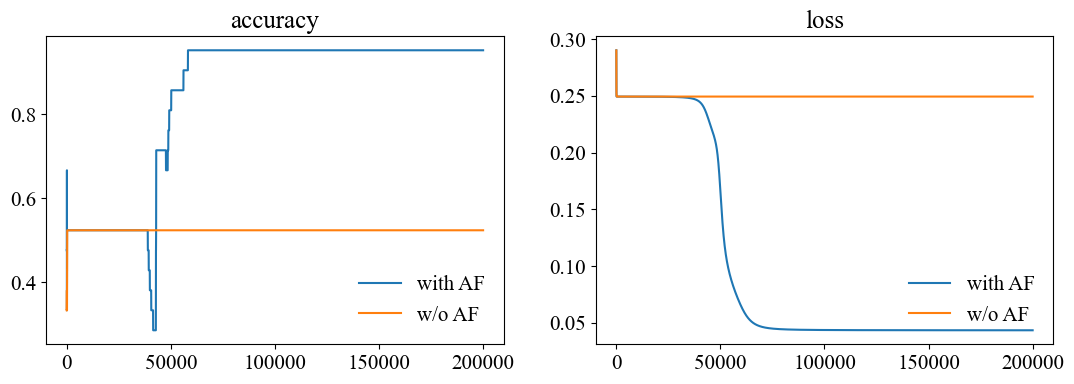

In [34]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1,2,1)
plt.plot(acc_xor, label = 'with AF')
plt.plot(acc_xor_noS, label = 'w/o AF')
plt.legend(loc = 4, frameon=False)
plt.title('accuracy')
plt.subplot(1,2,2)
plt.plot(loss_xor, label = 'with AF')
plt.plot(loss_xor_noS, label = 'w/o AF')
plt.legend(loc = 4, frameon=False)
plt.title('loss')

## Extra
### Try different activation functions

In [24]:
# code NN (ReLu activation function)
class Lab1_NN_Relu:
    def __init__(self, seed, input_size, L1_size, L2_size, Output_size):
        
        # Initial weights (rand variable)
        np.random.seed(seed)
        self.w1 = np.random.rand(input_size, L1_size)
        self.w2 = np.random.rand(L1_size, L2_size)
        self.w3 = np.random.rand(L2_size, Output_size)

        # Initial biases (rand variable)
        self.b1 = np.zeros((1, L1_size))
        self.b2 = np.zeros((1, L2_size))
        self.b3 = np.zeros((1, Output_size))

    def feedforward(self, Input):
        # First hidden layer
        self.z1 = RELU(np.dot(Input, self.w1)+self.b1)
        # Second hidden layer
        self.z2 = RELU(np.dot(self.z1, self.w2)+self.b2)
        # Output layer
        self.y = RELU(np.dot(self.z2, self.w3)+self.b3)
        return self.y

    def backprop(self, Input, GT, learning_rate):
        # Backpropagation and Wights Update
        # W3 & b3
        loss_derivative = (-1)*(GT-self.y)
        Delta_3 = loss_derivative * RELU_derivative(self.y)
        self.w3 -= self.z2.T.dot(Delta_3)*learning_rate
        self.b3 -= np.sum(Delta_3, axis=0, keepdims=True)*learning_rate
        
        # W2 & b2
        Delta_3_w3_T = Delta_3.dot(self.w3.T)
        Delta_2 = Delta_3_w3_T*RELU_derivative(self.z2)
        self.w2 -= self.z1.T.dot(Delta_2)*learning_rate
        self.b2 -= np.sum(Delta_2, axis=0, keepdims=True)*learning_rate
        
        # W1 & b1
        Delta_2_w2_T = Delta_2.dot(self.w2.T)
        Delta_1 = Delta_2_w2_T*RELU_derivative(self.z1)
        self.w1 -= Input.T.dot(Delta_1)*learning_rate
        self.b1 -= np.sum(Delta_1, axis=0, keepdims=True)*learning_rate

    def train(self, Input, GT, lr, epochs, printsize):
        train_loss = []; train_acc = [];
        for epoch in range(epochs):
            output = self.feedforward(Input)
            loss = np.mean(np.square(GT-output))
            acc = np.mean(output.round(0) == GT)
            train_loss.append(loss)
            train_acc.append(acc)
            self.backprop(Input, GT, lr)
            if epoch%printsize == 0:
                print(f"Epoch: {epoch}, Loss: {loss:.6f}")
        return output, train_loss, train_acc

In [25]:
#Relu
seed = 41
input_size = 2
L1_size = 3
L2_size = 3
Output_size = 1
lr = 0.001
lr_xor = 0.01
epochs = 100000
epochs_xor = 200000
printsize = 5000
printsize_xor = 10000

print('Dataset 1')
print('--------------------------------------')
nn_RL = Lab1_NN_Relu(seed, input_size, L1_size, L2_size, Output_size)
pred_RL, loss_RL, acc_RL = nn_RL.train(x, y, lr, epochs, printsize)

print('--------------------------------------')
print('Dataset 2')
print('--------------------------------------')
nn_xor_RL = Lab1_NN_Relu(seed, input_size, L1_size, L2_size, Output_size)
pred_xor_RL, loss_xor_RL, acc_xor_RL = nn_xor_RL.train(x_xor, y_xor, lr_xor, epochs_xor, printsize_xor)

Dataset 1
--------------------------------------
Epoch: 0, Loss: 0.284121
Epoch: 5000, Loss: 0.075034
Epoch: 10000, Loss: 0.075034
Epoch: 15000, Loss: 0.075034
Epoch: 20000, Loss: 0.075034
Epoch: 25000, Loss: 0.075034
Epoch: 30000, Loss: 0.075034
Epoch: 35000, Loss: 0.075034
Epoch: 40000, Loss: 0.075034
Epoch: 45000, Loss: 0.075034
Epoch: 50000, Loss: 0.075034
Epoch: 55000, Loss: 0.075034
Epoch: 60000, Loss: 0.075034
Epoch: 65000, Loss: 0.075034
Epoch: 70000, Loss: 0.075034
Epoch: 75000, Loss: 0.075034
Epoch: 80000, Loss: 0.075034
Epoch: 85000, Loss: 0.075034
Epoch: 90000, Loss: 0.075034
Epoch: 95000, Loss: 0.075034
--------------------------------------
Dataset 2
--------------------------------------
Epoch: 0, Loss: 0.290131
Epoch: 10000, Loss: 0.075452
Epoch: 20000, Loss: 0.075096
Epoch: 30000, Loss: 0.074942
Epoch: 40000, Loss: 0.074845
Epoch: 50000, Loss: 0.074786
Epoch: 60000, Loss: 0.074743
Epoch: 70000, Loss: 0.074709
Epoch: 80000, Loss: 0.074683
Epoch: 90000, Loss: 0.074660
Ep

#### Draw comparision between sigmoid and ReLu
#### RL: Dataset 1

Text(0.5, 1.0, 'loss')

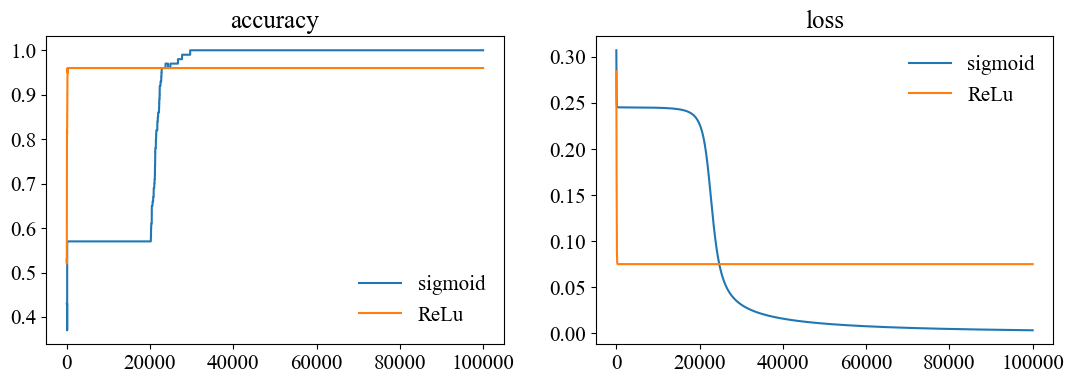

In [26]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1,2,1)
plt.plot(acc, label = 'sigmoid')
plt.plot(acc_RL, label = 'ReLu')
plt.legend(loc = 4, frameon=False)
plt.title('accuracy')
plt.subplot(1,2,2)
plt.plot(loss, label = 'sigmoid')
plt.plot(loss_RL, label = 'ReLu')
plt.legend(loc = 1, frameon=False)
plt.title('loss')

#### RL: Dataset 2

Text(0.5, 1.0, 'loss')

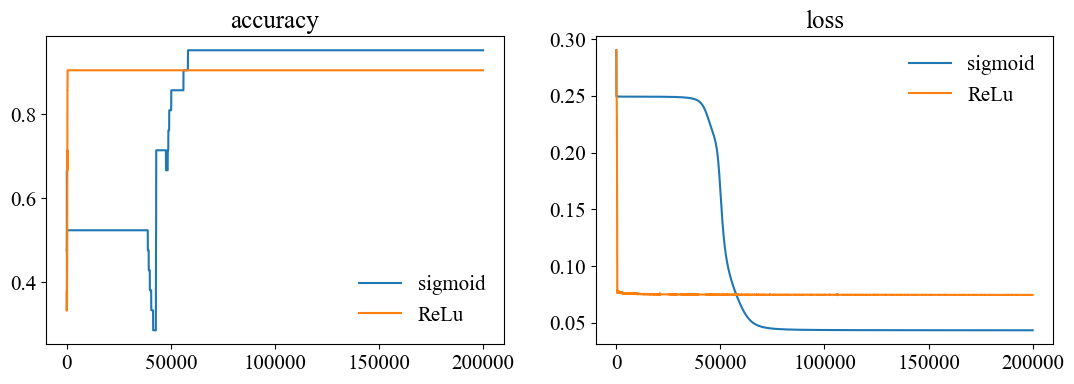

In [27]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = (13, 4)
plt.subplot(1,2,1)
plt.plot(acc_xor, label = 'sigmoid')
plt.plot(acc_xor_RL, label = 'ReLu')
plt.legend(loc = 4, frameon=False)
plt.title('accuracy')
plt.subplot(1,2,2)
plt.plot(loss_xor, label = 'sigmoid')
plt.plot(loss_xor_RL, label = 'ReLu')
plt.legend(loc = 1, frameon=False)
plt.title('loss')

In [28]:
# plt.subplot(1,3,3)
# false_pred = (y[:, 0]-pred[:, 0])**2
# cm = plt.cm.get_cmap('Blues')
# plt.scatter(x[:, 0], x[:, 1], c=false_pred, marker='o', label='Ground Truth',cmap=cm)
# plt.title('$\Delta$ loss')
# plt.colorbar()